
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# Curso R4052 


### Objetivos

A partir de un plantilla de filtro, analizar, simular, implementar y medir un circuito que responda a dicha plantilla.

Consolidar los conceptos de teoría moderna de filtrado mediante la implementación circuital.

Medir la respuesta en frecuencia del filtro con un osciloscopio para frecuencias entre 20 Hz y 100 kHz.

Descripción

Se pretende implementar una función transferencia con el circuito integradoUAF42 que posee una característica especial: capacitores de muy baja tolerancia (1%) integrados. Esto permite obtener respuestas en frecuencia del filtro sumamente similares a las simulaciones.

Referencias del integrado UAF42:

Página de Texas Instruments con material: https://www.ti.com/product/UAF42

Hoja de datos: https://www.ti.com/lit/ds/symlink/uaf42.pdf 

<table>
  <tr>
    <td>Función de aproximación</td>
    <td>Frecuencia de corte</td>
    <td>Frecuencia de stop</td>
    <td>Atenuación máxima en banda de paso</td>
    <td>Atenuación mínima en banda de stop</td>
  </tr>
  <tr>
    <td>Máxima Planicidad</td>
    <td>1000Hz</td>
    <td>3000Hz</td>
    <td>3dB</td>
    <td>18dB</td>
   </tr>
</table>

Normalizando todo en 1000Hz

<table>
  <tr>
    <td>Función de aproximación</td>
    <td>Frecuencia de corte</td>
    <td>Frecuencia de stop</td>
    <td>Atenuación máxima en banda de paso</td>
    <td>Atenuación mínima en banda de stop</td>
  </tr>
  <tr>
    <td>Máxima Planicidad</td>
    <td>1</td>
    <td>3</td>
    <td>3dB</td>
    <td>18dB</td>
   </tr>
</table>

wp=1
ws=3

$\alpha_{max}=3dB$

$\alpha_{min}=18dB$

Caluclo de $\epsilon $

$$ \mid T(\omega)\mid^2=\frac{1}{1+\epsilon^2\omega^{2N}} $$

$$(10^{-\frac{\alpha_{max}}{10}})^2=\frac{1}{1+\epsilon^2}\mid_{\omega=1} $$

$$ 10^{\frac{-\alpha_{max}}{10}} \cdot (1+\epsilon^2)=1 $$ 

$$ \epsilon=\sqrt{10^{\frac{\alpha_{max}}{10}}-1} $$

Calculo de N
<br><br>
$$ 10^{-\frac{\alpha_{min}}{10}}=\frac{1}{1+\epsilon^2 (\omega_s)^{2N}} $$
<br>
$$ 10^{-\frac{\alpha_{min}}{10}} \cdot (1+\epsilon^2 (\omega_s)^{2N}) $$
<br>
$$ (\omega_s)^{2N}=\frac{1-10^{-\frac{\alpha_{min}}{10}}}{10^{-\frac{\alpha_{min}}{10}}\epsilon^2} $$
<br>
$$ N=\frac{log(\frac{10^{(\frac{\alpha_{min}}{10})}-1}{\epsilon^2})}{2log(\omega_s)} $$
<br>


In [1]:
import numpy as np
import scipy.signal as sig

alfa_max = 3 # dB \alpha_{max} 
alfa_min = 18 # dB \alpha_{min} 
ws=3
 
eps=np.sqrt(10**(alfa_max/10)-1)
N = np.log10(((10**((alfa_min/10))-1)/(eps**2)))/(2*np.log10(ws))
N=np.ceil(N)
eps=np.round(eps,2)    
print('El filtro es de orden:',N,'con Epsilon:',eps)
    

El filtro es de orden: 2.0 con Epsilon: 1.0


Sabemos que la transferencia del filtro normalizada de segundo orden con Epsilon=1 es:


$$H(s)=\frac{1}{s^2+\sqrt2 s+1}$$



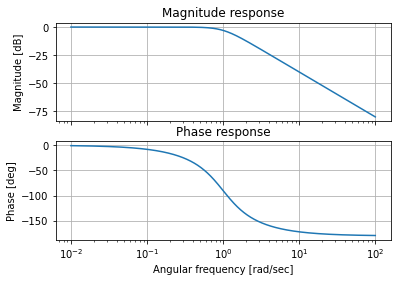

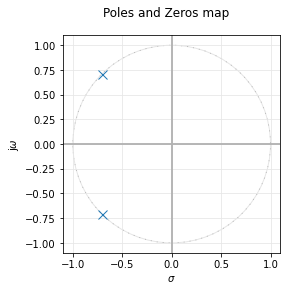

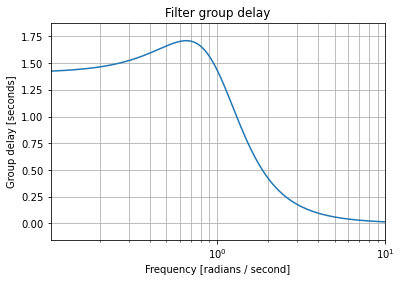

In [2]:
from scipy import signal

import matplotlib.pyplot as plt

from splane import *

num=[1]
den=[1,1.41,1]

all_sys=(signal.TransferFunction(num,den))
fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, "", 3, ())

w, h = signal.freqs(num,den)
plt.figure()
plt.plot(w[1:], -np.diff(np.unwrap(np.angle(h)))/np.diff(w))
plt.xscale('log')
plt.title('Filter group delay')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Group delay [seconds]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

### Sintesis del filtro:

Circuito propuesto por el fabricante:

<img src="./_UAF42.png" align="center" width="800" /> 

De la hoja  de datos:
<img src="./Ecuaciones.png" align="center" width="500" /> 

Si tomamos que RF1=RF2=RF

Sabiendo que las resistencias integradas son todas iguales al igual que los capacitores tenemos:

$$\omega_n^2=\frac{1}{R_{F}^2C^2}$$

$$Q=\frac{1+\frac{50K\cdot(R_G+R_Q)}{R_G\cdot R_Q}}{2}$$

$$A=\frac{2}{R_G\cdot (\frac{1}{R_G}+\frac{1}{R_Q}+\frac{1}{50K})}$$

Dado que tanto RG y RQ afectan Q y A simultaneamente, y que tenemos disponible un amplificador por compenzar la ganancia dejamos solo una resistencia en la entrada en serie (RS), siendo ahora las ecuaciones de trabajo:

$$\omega_n^2=\frac{1}{R_{F}^2C^2}$$

$$Q=\frac{1+\frac{50K}{RS}}{2}$$

$$A=2\cdot \frac{50K}{50K+Rs}$$



Encontrando la norma de impedancia:

Necesitamos trabajar con capacitores de 1000pf (impuestos por la fabricante)

La frecuencia de desnormalizacion =$2\pi1000KHz$

Buscamos la norma de impedancia:

$C=\frac{C'}{\omega_n \cdot Rn}$

$Rn=\frac{C'}{\omega_n \cdot C}$

In [3]:
Rn=1/(2*np.pi*1000*(10**(-9)))
print(f"Norma de impedancia Rn={round(Rn,2)}")


Norma de impedancia Rn=159154.94


El valor de los resistores de 50K ahora deben ser de:

In [4]:
R=50*10**3
R50n=round(R/Rn,3)
print(f"R50K={R50n}Ω")

R50K=0.314Ω


In [5]:
Wn=1
C=1 #C1=C2
RF=(C**2)*(Wn**2) #RF1=RF2
RF=round(1/np.sqrt(RF),2)
print(f"RF1=RF2={RF:.2f}Ω")


RF1=RF2=1.00Ω


In [6]:
Q=0.707
RS=1/((2*Q-1)/0.314)
RS=round(RS,2)
print(f"RS={RS:.2f}Ω")

RS=0.76Ω


In [7]:
#La ganancia en continua:

A=2*(0.314/(0.314+0.76))
print("Ganacia en continua del filtro:",round(A,2))
print(f"Para que la ganancia sea de 0dB en continua utilizamos un operacional extra que nos provee el UAF42 para ganar {round(1/A,2)} veces y tener 0dB de ganancia total del filtro")


Ganacia en continua del filtro: 0.58
Para que la ganancia sea de 0dB en continua utilizamos un operacional extra que nos provee el UAF42 para ganar 1.71 veces y tener 0dB de ganancia total del filtro


### Simulación matemática y circuital

<img src="./simu.png" align="center" width="1000" /> 

### Desnormalizando

In [8]:
print(f"RF1 y RF2 valen: {round(Rn/10**3,2)}KΩ")
print(f"RS vale: {round(0.76*Rn/10**3,2)}KΩ")

RF1 y RF2 valen: 159.15KΩ
RS vale: 120.96KΩ


Para RF1 y RF2 adopto 150KΩ pudiendo tener un preset para ajustar la diferencia si fuera necesario,

La frecuencia de corte queda entonces:

In [9]:
RF=150*10**3
C=1*10**-9
f=1/(2*np.pi*(C*RF))
print(f"frecuencia a esperar: {f:.2f}Hz")

frecuencia a esperar: 1061.03Hz


### Simulacion desnormalizada:

<img src="./simudesnorm.png" align="center" width="1000" /> 

A modo de poder visualizar algunos efectos en el laboratorio agregaremos a la entrada una resistencia variable de 250KΩ en serie con una resistencia de 47Ω 

Lo que nos dará un Q entre:

In [10]:
Qmin=0.5+50/(2*297)
print(f"Q Minimo : {Qmin:.2f}")

Qmax=0.5+50/(2*47)
print(f"Q Maximo : {Qmax:.2f}")

Q Minimo : 0.58
Q Maximo : 1.03


Para estos valores una vez obtenidos se puede ajustar la ganancia de salida en continua para que sea de 0dB si así fuera necesario vemos esta simulación en escala lineal para apreciar los sobrepicos que vamos a obtener. 

<img src="./simudesnormQvariable.png" align="center" width="1000" /> 


Si hacemos A constante compenzando las perdidas en la ganancia de la etapa de salida

<img src="./simudesnormQvariableActe.png" align="center" width="1000" /> 

<img src="./VariacionQ.png" align="center" width="400" /> 


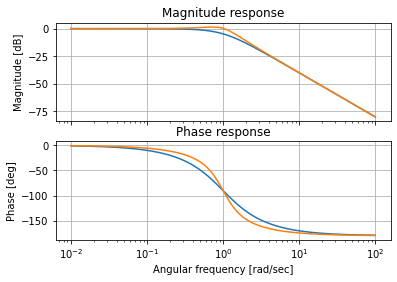

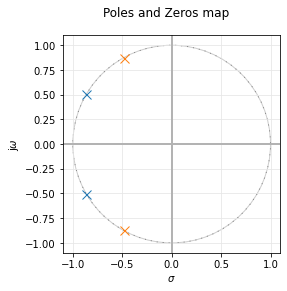

In [11]:
Qminimo=0.58
num=[1]
den=[1,1/Qminimo,1]

all_sys=(signal.TransferFunction(num,den))
fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, "", 3, ())


QMaximo=1.03
num=[1]
den=[1,1/QMaximo,1]

all_sys=(signal.TransferFunction(num,den))
fig_id, axes_hdl = bodePlot(all_sys, 1, ())
analog_fig_id, analog_axes_hdl = pzmap(all_sys, "", 3, ())

